<a href="https://colab.research.google.com/github/MacFarren/Lab-Farren-Rubina/blob/main/Lab5_enunciado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio 5: Clasificación 🤗

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Primavera 2025</strong></center>


### Cuerpo Docente:

- Profesores: Diego Cortez, Gabriel Iturra
- Auxiliares: Melanie Peña, Valentina Rojas
- Ayudantes: Nicolás Cabello, Cristopher Urbina

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Sebastián Rubina
- Nombre de alumno 2: Maximiliano Farren

### **Link de repositorio de GitHub:** [Repositorio](https://github.com/MacFarren/Lab-Farren-Rubina)

### Temas a tratar
- Clasificación en problemas desbalanceados
- Lightgbm y xgboost
- Pipelines

## Reglas:

- **Grupos de 2 personas**
- Fecha de entrega: Entregas Martes a las 23:59.
- Instrucciones del lab el viernes a las 16:15 en formato online. Asistencia no es obligatoria, pero se recomienda **fuertemente** asistir.
- <u>Prohibidas las copias</u>. Cualquier intento de copia será debidamente penalizado con el reglamento de la escuela.
- Tienen que subir el laboratorio a u-cursos y a su repositorio de github. Labs que no estén en u-cursos no serán revisados. Recuerden que el repositorio también tiene nota.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Pueden usar cualquier material del curso que estimen conveniente.





### Objetivos principales del laboratorio
- Comprender cómo trabajar con problemas de clasificación con clases desbalanceadas.
- Aplicar los modelos lightgbm y xgboost.
- Practicar Pipelines

# Parte Teórica [12 puntos]




1. Explique cuál es la diferencia entre los datos de entrenamiento y validación. [1 punto]

2. Explique cuál es el principal desafío al trabajar problemas de clasificación con data no supervisada. [1 punto]

3. Explique en **sus palabras** qué es la matriz de confusión y para qué se utiliza. [1 puntos]

4. Escriba la fórmula de las siguientes métricas y explique con **sus palabras** cómo se interpretan. [1 punto cada uno]

  * Accuracy
  * Precision
  * Recall
  * F1 score

5. Explique qué métrica recomendaría para los siguientes contextos de clasificación. [1 punto cada uno]

  * Mantenimiento predictivo de fallas de maquinaria pesada en la industria minera.  
  * Detección de enfermedades altamente contagiosas.
  * Aprobación de créditos de alto riesgo.
  * Detección de crímenes.

6. Explique qué es la calibración de modelos y para qué se usa. [1 punto]


**Respuesta:**

*Escriba su respuesta aquí*

P1: Los datos de entrenamiento son la información que se utiliza para ajustar los parámetros del modelo y se utilizan para aprender patrones a partir de ejemplos etiquetados. Los datos de validación son información que se guarda para permanecer al margen del entrenamiento y que son los que se utilizan para las decisiones de modelado que se toman sin sesgo, como pueden ser: seleccionar hiperparámetros, escoger el umbral de la decisión, comparar algoritmos, detectar sobreajuste.

P2: El principal desafío de trabajar problemas de clasificación con data no supervisada es que no existe una "verdad" de referencia, debido a que es necesario elegir grupos o forma de las particiones sin conocer la forma y sin saber si realemente se corresponde a las clases "reales", de esta forma los clusters pueden no alinearse a las categorías relevantes. Además su evaluación es imprecisa, pues se utilizan medidas internas como la silueta.

P3: La matriz de confusión es una representación tabular que sintetiza, por cada clase, las predicciones que el modelo realiza correctamente y las predicciones que efectúa erróneamente: Verdaderos Positivos (TP), Falsos Positivos (FP), Verdaderos Negativos (TN), y Falsos Negativos (FN). La matriz de confusión permite determinar cuál es el tipo de error más cometido por el modelo, permite calcular métricas derivadas de la matriz de confusión, como la precision, el recall, el F1 score, especificidad, y permite ajustar umbrales y costes en función de la criticidad de FP y FN.


P4:
- Accuracy: (TP + TN) / (TP + TN + FP + FN), es la proporción de aciertos globales, sin embargo, con clases desbalanceadas, debido a que un modelo que predice siempre la clase mayoritaria obtiene un accuracy alta. Mientras más alta sea la accuracy es mejor, en caso de clases balanceadas, si no lo está, no sirve tanto ya que puede ser engañosa. Sensible al umbral.

- Precision: (TP / TP + FP), es la correcta predicción de predicciones positivas, cuantas son correctas, alta precisión implica pocos falsos positivos. Se utiliza cuando los falsos positivos son costosos, al aumentar el recall puede bajar y es sensible al umbral. Reportar macro recall si hay desbalance

- Recall: (TP / (TP + FN), se preocupa de los positivos reales, revisa cuantos detecta el modelo. Un alto recall indica que se cuentan con pocos falsos negativos. Util en medicina, donde es muy costoso tener un falso negativo, por ejemplo en cancer. Es sensible al umbral, donde mover el umbral hacia abajo puede subir el recal. Reportar macro recall si hay desbalance

- F1 Score: 2 * (Precision * recall / (precision + recall), es la media armónica entre precisión y recall, es útil cuando se necesita equilibrar ambas clases y hay desbalance. Evita falsos positivos y falsos negativos, sin embargo, al no incorporar los verdaderos negativos, puede ignorar la clase mayoritaria.

P5:

- Mantenimiento predictivo de fallas de maquinaria pesada en la industria minera: Recall, ya que perder una falla implica grandes costos, como puede ser un accidente o maquinaria sin poder utilizarce y perder dinero o tiempo.

- Detección de enfermedades altamente contagiosas: Recall, ya que omitir un falso negaetivo es muy costoso, ya que decirle a una persona que no tiene cancer cuando en verdad si lo tiene. Es mejor decir que si tenia cancer y hacerle más estudios y descartarlo después a decirle que no tenía

- Aprobación de créditos de alto riesgo: Si lo que se busca es aprobar créditos, se recomienda utilizar precision de “aprobar”, ya que se minimizan los falsos positivos, es decir, que se minimiza aprobar a quien no pagará.
Si lo que es positivo es si será moroso, se prioriza Recall de “moroso”, ya que se minimizan los falsos negativos, ya que es importante conceder a quien no pagará.

- Detección de crímenes: Recall, con esto se reducen los falso negativos o no detectar un crimen, nuevamente debido a lo complejo de no detectarlo. Es mejor equivocarse diciendo que si era y que realmente no lo era.

P6: La calibración de modelos ajusta las probabilidades predichas para que reflejen las frecuencias reales de los datos. Se utiliza para tomar desiciones basadas en las probabilidades, donde por ejemplo, es posible fijar umbrales coherentes con la data y priorizar, tener una mayor confianza en lo que se está haciendo, además para combinar modelos y mejorar interpretabilidad de los usuarios.

# Parte práctica [48 puntos]


<p align="center">
  <img src="https://drive.google.com/uc?export=view&id=1BnO4tyh3vM2P199Ec9s3JjngQ4qQ9seP"
" width="300">
</p>


Tras el trágico despido de la mítica mascota de Maipú, Renacín decide adentrarse como consultor en el mercado futbolero, el cuál (para variar...) está cargado en especulaciones.

Como su principal tarea será asesorar a los directivos de los clubes sobre cuál jugador comprar y cuál no, Renacín desea generar modelos predictivos que evaluén distintas características de los jugadores; todo con el fin de tomar decisiones concretas basadas en los datos.

Sin embargo, su condición de corporeo le impidió tomar la versión anterior de MDS7202, por lo que este motivo Renacín contrata a su equipo para lograr su objetivo final. Dado que aún tiene fuertes vínculos con la dirección de deportes de la municipalidad, el corporeo le entrega base de datos con las estadísticas de cada jugador para que su equipo empieze a trabajar ya con un dataset listo para ser usado.


**Los Datos**

Para este laboratorio deberán trabajar con el csv `statsplayers.csv`, donde deberán aplicar algoritmos de aprendizaje supervisado de clasificación en base a características que describen de jugadores de fútbol.

Para comenzar cargue el dataset señalado y a continuación vea el reporte **`Player_Stats_Report.html`** (adjunto en la carpeta del enunciado) que describe las características principales del `DataFrame`.

In [1]:
## Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
#try:
#    from google.colab import drive
#    drive.mount("/content/drive")
#    path = 'Dirección donde tiene los archivos en el Drive'
#except:
#    print('Ignorando conexión drive-colab')

In [2]:
from google.colab import files
import pandas as pd

In [3]:
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import (accuracy_score, precision_score, recall_score, classification_report, confusion_matrix, f1_score)
from sklearn.linear_model import LogisticRegression


In [4]:
# Carga de datos
# Subir archivo para colab
uploaded = files.upload()

# Cargar los archivos
df = pd.read_csv("stats_players.csv")

Saving stats_players.csv to stats_players (1).csv


## 1. Predicción de Seleccionados Nacionales [14 puntos]

<p align="center">
  <img src="https://www.futuro.cl/wp-content/uploads/2016/06/chile-argentina-meme-12.jpg" width="300">
</p>



### 1.1 Preprocesamiento [5 puntos]

Tareas:

1. Genere los labels para la clasificación binaria en una variable llamada `label`. Para esto, trabaje sobre el atributo `National_Position` suponiendo que los valores nulos son jugadores no seleccionados para representar a su país. [Sin puntaje]

2. Hecho esto, ¿cuántos se tienen ejemplos por cada clase? Comente lo que observa. [1 punto]

3. Genere un `ColumnTransformer` en donde especifique las transformaciones que hay que realizar para cada columna (por ejemplo StandarScaler, MinMaxScaler, OneHotEncoder, etc...) para que puedan ser utilizadas correctamente por el modelo predictivo y guárdelo una variable llamada `col_transformer`. [2 puntos]

4. Comente y justifique las transformaciones elegidas sobre cada una de las variables (para esto utilice el material `Player_Stats_Report.html` que viene en el zip del lab), al igual que las transformaciones aplicadas. [2 puntos]

**Respuesta:**

In [5]:
#Se genera label sobre el atributo National_Position, suponiendo que los valores nulos son jugadores no seleccionados para representar a su país
df['label'] = df['National_Position'].apply(lambda x: 0 if pd.isna(x) else 1)

In [6]:
display(df['label'].value_counts())

,count
label,
0,16513
1,1075


Label tiene una gran cantidad de datos, es decir, asumiendo que son jugadores que no se han llamado a la selección, solo un 6.5% de los jugadores son llamados a jugar por su seleccion  (solo 1075 jugadores, de un total de 16513), lo que es un número pequeño, pero realista, asumiendo el nivel competitivo del deporte.

In [7]:
# Definir las transformaciones para cada tipo de columna
# Características numéricas: StandardScaler
# Características categóricas: OneHotEncoder

# Identificar columnas numéricas y categóricas (excluyendo 'label' y 'National_Position')
columnas_numericas = df.select_dtypes(include=np.number).columns.tolist()
columnas_numericas.remove('label')

columnas_categoricas = df.select_dtypes(include='object').columns.tolist()
columnas_categoricas.remove('Name')
columnas_categoricas.remove('Nationality')
columnas_categoricas.remove('Club_Position') # Club_Position se usará en la parte 2
columnas_categoricas.remove('National_Position')

# Crear el ColumnTransformer
col_transformer = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), columnas_numericas), # Usando StandardScaler para características numéricas
        ('cat', OneHotEncoder(handle_unknown='ignore'), columnas_categoricas) # Usando OneHotEncoder para características categóricas
    ],
    remainder='passthrough' # Mantener otras columnas para uso posterior
)

En un principio se identifican los atributos numericos, por otro lado las categóricas. Para las variables numéricas se decidió aplicar StandardScaler, ya que centra cada característica en media cero y la escala a una desviación estándar unitaria. Ya que con esto se puede trabajar con los datos a una misma escala. Para las categóricas, se eligió el OneHotEncoder con el parámetro handle_unknown='ignore'. Esto convierte cada categoría en una representación binaria sin imponer un orden artificial y, al mismo tiempo, evita errores si durante la fase de prueba aparecen categorías nuevas no vistas en el entrenamiento.

La variable label se mantuvo fuera porque corresponde al objetivo del modelo y procesarla junto con las características produciría data leakage.

La columna Name se descartó debido a su alta cardinalidad y su carácter de identificador único, que no aporta información generalizable y solo incrementaría la dimensionalidad al utilizar OneHotEncoder. Lo mismo sucede con Nationality, que posee más de 160 nacionalidades distintas.

La variable Club_Position no se modificó debido a que después se realiza un tratamiento distinto.

National_Position se elimina debido a que contiene una gran cantidad de datos faltantes

### 1.2 Entrenamiento [3 puntos]

Ahora, vamos a entrenar los pipelines generados en los pasos anteriores. Para esto, debe realizar las siguientes tareas:

1. Separe los datos de entrenamiento en un conjunto de entrenamiento y de prueba  (la proporción queda a su juicio). En este paso, seleccione los ejemplos de forma aleatoria e intente mantener la distribución original de labels de cada clase en los conjuntos de prueba/entrenamiento. (vea la documentación de `train_test_split`). [1 puntos]


2. Defina un pipeline llamado `pipeline_xgboost` y otro llamado `pipeline_lightgbm`. Estos pipelines deben tener el mismo ColumnTransformer definido en la sección de preprocesamiento, pero deben variar los clasificadores de acuerdo al nombre de cada pipeline. [1 puntos]

3. Entrene los pipelines. [1 punto]



**Respuesta:**

In [8]:
#Armar el set de numéricas + categóricas, además de agregar 'Club_Position'
feature_cols = columnas_numericas + columnas_categoricas
X = df[feature_cols].copy()
y = df['label'].copy()

# 2) Split estratificado para mantener proporción de clases
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Tamaño train:", X_train.shape, "| Tamaño test:", X_test.shape)
print("Distribución train:\n", y_train.value_counts(normalize=True))
print("Distribución test:\n", y_test.value_counts(normalize=True))
print("Ojo, el 35 son las columnas de cada subdf")


Tamaño train: (14070, 35) | Tamaño test: (3518, 35)
Distribución train:
 label
0    0.938877
1    0.061123
Name: proportion, dtype: float64
Distribución test:
 label
0    0.938886
1    0.061114
Name: proportion, dtype: float64
Ojo, el 35 son las columnas de cada subdf


In [9]:
# Calcular ratio en el set de entrenamiento
n_pos = y_train.sum()
n_neg = len(y_train) - n_pos
ratio = n_neg / n_pos
ratio

15.36046511627907

Se da cuenta que se cuenta con data desbalanceada, por lo que se le asignarán los pesos calculados anteriormente


In [10]:
# Pipeline con XGBoost
pipeline_xgboost = Pipeline(steps=[
    ('prep', col_transformer),
    ('model', XGBClassifier(
        n_estimators=300,
        learning_rate=0.1,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        n_jobs=-1,
        eval_metric='logloss',
        scale_pos_weight=ratio #ratio calculado anteriormente
    ))
])

# Pipeline con LightGBM
pipeline_lightgbm = Pipeline(steps=[
    ('prep', col_transformer),
    ('model', LGBMClassifier(
        n_estimators=300,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        n_jobs=-1,
        is_unbalance=True,
        verbose=-1
    ))
])

In [11]:
# Entrenamiento
pipeline_xgboost.fit(X_train, y_train)
pipeline_lightgbm.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['Height', 'Weight', 'Age',
                                                   'Weak_foot', 'Skill_Moves',
                                                   'Ball_Control', 'Dribbling',
                                                   'Marking', 'Sliding_Tackle',
                                                   'Standing_Tackle',
                                                   'Aggression', 'Reactions',
                                                   'Interceptions', 'Vision',
                                                   'Composure', 'Crossing',
                                                   'Short_Pass', 'Long_Pass',
                                                   'Acceleration', 'Speed',
                                                   'Stamina', 'Strength',
                                                   'Balance', 'Agility',
                                                   'Jumping', 'Heading',
                                                   'Shot_Power', 'Finishing',
                                                   'Long_Shots', 'Curve', ...]),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Preffered_Foot',
                                                   'Work_Rate'])])),
                ('model',
                 LGBMClassifier(colsample_bytree=0.8, is_unbalance=True,
                                n_estimators=300, n_jobs=-1, random_state=42,
                                subsample=0.8, verbose=-1))])

### 1.3 Resultados [6 puntos]

1. Calcule las métricas accuracy, precisión y recall de la clase positiva (la que indica que un jugador es seleccionado nacional) para evaluar el rendimiento de los distintos modelos. Verifique sus resultados usando `classification_report`. [2 puntos]

2. Explique qué implican los valores de accuracy, precisión y recall de la clase positiva (la que indica que un jugador es seleccionado nacional) y cómo influye la cantidad de ejemplos por clase en los resultados obtenidos. [2 puntos]

3. Explique qué métrica le parece más adecuada y concluya qué modelo tiene un mejor desempeño. [2 puntos]

**Respuesta:**

In [12]:
def evaluar_modelo(nombre, pipeline, X_test, y_test):
    # Predicción con el pipeline
    y_pred = pipeline.predict(X_test)

    # Métricas solicitadas (clase positiva = 1)
    acc  = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, pos_label=1, zero_division=0)
    rec  = recall_score(y_test, y_pred, pos_label=1, zero_division=0)

    print(f"{nombre}")
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precisión (clase 1): {prec:.4f}")
    print(f"Recall    (clase 1): {rec:.4f}\n")

    # Verificación con classification_report
    print("Reporte de clasificacion:")
    print(classification_report(y_test, y_pred, digits=3))
    print("Matriz de confusión:")
    print(confusion_matrix(y_test, y_pred))
    print("-"*50, "\n")

# Evaluar ambos modelos
evaluar_modelo("XGBoost",  pipeline_xgboost,  X_test, y_test)
evaluar_modelo("LightGBM", pipeline_lightgbm, X_test, y_test)


XGBoost
Accuracy:  0.9250
Precisión (clase 1): 0.3497
Recall    (clase 1): 0.2651

Reporte de clasificacion:
              precision    recall  f1-score   support

           0      0.953     0.968     0.960      3303
           1      0.350     0.265     0.302       215

    accuracy                          0.925      3518
   macro avg      0.651     0.617     0.631      3518
weighted avg      0.916     0.925     0.920      3518

Matriz de confusión:
[[3197  106]
 [ 158   57]]
-------------------------------------------------- 

LightGBM
Accuracy:  0.9284
Precisión (clase 1): 0.3851
Recall    (clase 1): 0.2884

Reporte de clasificacion:
              precision    recall  f1-score   support

           0      0.954     0.970     0.962      3303
           1      0.385     0.288     0.330       215

    accuracy                          0.928      3518
   macro avg      0.670     0.629     0.646      3518
weighted avg      0.920     0.928     0.924      3518

Matriz de confusión:
[[320

Para poder realizar de manera correcta el entrenamiento, es que se le ha cambiado la proporción a XGBoost, para intentar manejar el desbalance de clases positivas versus negativas, además de agregarle         is_unbalance=True al segundo modelo, ajustando el umbral de decisión de validación, sin embargo, los resultados muestran el efecto de trabajar con la variable objetivo desbalanceada.

Accuracy, o exactitud, es la proporción de aciertos (TP+TN)/Total, se mantiene alta porque está dominada por los verdaderos negativos de la clase mayoritaria, aun corrigiendo el desbalance en el entrenamiento, sigue reflejando principalmente el buen desempeño sobre los “no seleccionados” y por sí sola no captura la capacidad del modelo para encontrar la clase positiva.

La exactitud indica que tan correctas son las predicciones (TP/(TP+FP), donde al cambiar el umbral para aumentar cobertura, la precisión tiende a descender debido a que aceptamos más falsos positivos.

El Recall mide la cobertura sobre los verdaderos seleccionados, en donde esta es la medida más sensible al desbalance, debido a que con pocos ejemplos, se dejan escapar los falsos negativos.



Debido al claro desbalance, es que las métricas no son suficientes para poder predecir de manera correcta, sin embargo, el modelo que presenta el mejor equilibrio entre desempeño global y capacidad de detección de la clase positiva es LightGBM. En particular, mantiene una accuracy comparable a XGBoost (≈0,928 frente a ≈0,925), pero lo supera en los otros indicadores para el objetivo del estudio, posee una precisión de la clase positiva superior (≈0,385 vs. ≈0,350) y un recall también mayor (≈0,288 vs. ≈0,265), lo que implica identificar una mayor proporción de jugadores efectivamente seleccionados con menor proporción de falsos positivos que su contraparte. Dado el desbalance entre clases, el accuracy puede no ser la mejor opción, la combinación de mayor recall con una precisión no disminuida confirma que LightGBM ofrece la mejor relación señal-ruido sobre la clase de interés.

## 2. Predicción de posiciones de jugadores [4 puntos]

<p align="center">
  <img src="https://pbs.twimg.com/media/E1rfA1aWEAYU6Ny.jpg" width="300">
</p>

En una nueva jornada de desmesuradas transacciones deportivas, Renacín escuchó a sus colegas discutir acerca de que el precio de cada jugador depende en gran medida de la posición en la cancha en la que juega. Y además, que hay bastantes jugadores nuevos que no tienen muy claro en que posición verdaderamente brillarían, por lo que actualmente puede que actualmente estén jugando en posiciones sub-optimas.

Viendo que los resultados del primer análisis no son tan esperanzadores, el corporeo los comanda a cambiar su tarea: ahora, les solicita que construyan un clasificador enfocado en predecir la mejor posición de los jugadores en la cancha según sus características.

Para lograr esto, primero, les pide que etiqueten de la siguiente manera los valores que aparecen en el atributo `Club_Position`, pidiendo que agrupen los valores en los siguientes grupos:

**Nota**:  Renacín les recalca que **no deben utilizar los valores ```Sub``` y ```Res``` de esta columna**.

```python
ataque = ['ST', 'CF']
central_ataque = ['RW', 'CAM', 'LW']
central = ['RM', 'CM', 'LM']
central_defensa = ['RWB', 'CDM', 'LWB']
defensa = ['RB', 'CB', 'LB']
arquero = ['GK']
```

La elección del clasificador se justificar en base a la siguiente [guía](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) y se deben comentar los resultados obtenidos en la clasificación.

**Tareas:** [1 punto por tarea]

1. En un nuevo dataframe, aplique las etiquetas descritas anteriormente en cada uno de los valores señalados en esta sección y guárdelos en la variable `label`.
2. Cuente cuántos por clase quedan.
3. Entrene el nuevo pipeline y ejecute una evaluación de este.  
4. Comente los resultados obtenidos.

**Respuesta:**

In [13]:
# Creamos un nuevo data frame
df_pos = df.copy()

# Cramos lo solicitado según atributos
grupo_map = {
    'ataque': {'ST', 'CF'},
    'central_ataque': {'RW', 'CAM', 'LW'},
    'central': {'RM', 'CM', 'LM'},
    'central_defensa': {'RWB', 'CDM', 'LWB'},
    'defensa': {'RB', 'CB', 'LB'},
    'arquero': {'GK'}
}

# se eliminan "sub" y "res"
mask_valid = df_pos['Club_Position'].notna() & (~df_pos['Club_Position'].isin(['Sub', 'Res']))
df_pos = df_pos.loc[mask_valid].copy()

# Función de mapeo
def map_pos(value: str) -> str:
    for g, posiciones in grupo_map.items():
        if value in posiciones:
            return g
    return np.nan

df_pos['label'] = df_pos['Club_Position'].apply(map_pos)

# Contamos por clase para revisar no tener el mismo error de antes
print("Conteo por clase (label):")
print(df_pos['label'].value_counts())
print()



Conteo por clase (label):
label
defensa            1180
central             907
arquero             632
central_ataque      581
ataque              430
central_defensa     209
Name: count, dtype: int64



In [14]:
# Definir columnas, al igual que lo hicimos anteriormente, excluimos lo que no no queremos que esté en el modelo

columnas_numericas_pos = df_pos.select_dtypes(include=np.number).columns.tolist()
if 'label' in columnas_numericas_pos:
    columnas_numericas_pos.remove('label')

columnas_categoricas_pos = df_pos.select_dtypes(include='object').columns.tolist()
for col_drop in ['label', 'Club_Position', 'National_Position', 'Name', 'Nationality']:
    if col_drop in columnas_categoricas_pos:
        columnas_categoricas_pos.remove(col_drop)

#Creamos el column transformer pero ahora para posicion
col_transformer_pos = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), columnas_numericas_pos),
        ('cat', OneHotEncoder(handle_unknown='ignore'), columnas_categoricas_pos),
    ],
    remainder='drop'
)

# Preparar X, y y split multiclase
X_pos = df_pos.drop(columns=['label', 'Club_Position', 'National_Position', 'Name', 'Nationality'], errors='ignore')
y_pos = df_pos['label'].astype('category')

# Eliminar filas con NaN en 'label' antes de dividir los datos
df_pos_cleaned = df_pos.dropna(subset=['label']).copy()
X_pos_cleaned = df_pos_cleaned.drop(columns=['label', 'Club_Position', 'National_Position', 'Name', 'Nationality'], errors='ignore')
y_pos_cleaned = df_pos_cleaned['label'].astype('category')


X_train, X_test, y_train, y_test = train_test_split(
    X_pos_cleaned, y_pos_cleaned, test_size=0.2, random_state=42, stratify=y_pos_cleaned
)

# Definir el pipeline para LogisticRegression multinomial
pipeline_pos = Pipeline(steps=[
    ('prep', col_transformer_pos),
    ('model', LogisticRegression(
        solver='saga',
        max_iter=2000, n_jobs=-1, random_state=42
    ))
])

# Entrenar modelo
pipeline_pos.fit(X_train, y_train)

# Evaluar modelos
y_pred = pipeline_pos.predict(X_test)

acc  = accuracy_score(y_test, y_pred)
f1m  = f1_score(y_test, y_pred, average='macro')  # macro-F1: justo con clases desbalanceadas
print(f"Accuracy:  {acc:.4f}")
print(f"Macro-F1:  {f1m:.4f}\n")

print("Reporte de clasificación:")
print(classification_report(y_test, y_pred, target_names=sorted(y_pos_cleaned.unique().tolist()), digits=3))

print("Matriz de confusión (orden etiquetas):", sorted(y_pos_cleaned.unique().tolist()))
print(confusion_matrix(y_test, y_pred, labels=sorted(y_pos_cleaned.unique().tolist())))

Accuracy:  0.7449
Macro-F1:  0.6629

Reporte de clasificación:
                 precision    recall  f1-score   support

        arquero      1.000     1.000     1.000       126
         ataque      0.771     0.860     0.813        86
        central      0.584     0.610     0.597       182
 central_ataque      0.494     0.362     0.418       116
central_defensa      0.400     0.190     0.258        42
        defensa      0.834     0.958     0.892       236

       accuracy                          0.745       788
      macro avg      0.681     0.663     0.663       788
   weighted avg      0.723     0.745     0.729       788

Matriz de confusión (orden etiquetas): ['arquero', 'ataque', 'central', 'central_ataque', 'central_defensa', 'defensa']
[[126   0   0   0   0   0]
 [  0  74   8   4   0   0]
 [  0   8 111  36   7  20]
 [  0  13  56  42   2   3]
 [  0   1   9   2   8  22]
 [  0   0   6   1   3 226]]


Notamos el modelo es aceptable (accuracy = 0,745) y razonable en términos de equilibrio entre clases (macro-F1 = 0,663), sin embargo, la matriz de confusión y los indicadores por clase evidencian diferencias marcadas de dificultad según la posición.


Los roles extremos se distinguen de manera correctar (GK, defensa, ataque), sin embargo, le cuesta separar sub-roles del mediocampo, donde el perfil de atributos es más parecido y las etiquetas agregadas introducen zonas limítrofes.
Las clases arquero y defensa son las más separables, arquero alcanza un desempeño perfecto (P=R=F1=1,00), consistente con atributos muy distintivos del puesto, y defensa logra resultados altos (P=0,834; R=0,958; F1=0,892), lo que sugiere que el modelo capta bien los rasgos defensivos. ataque también presenta un rendimiento sólido (F1=0,813) con buen recall (0,860). En contraste, las clases del medio muestran mayor solapamiento, donde central queda en un nivel intermedio (F1=0,597) y central_ataque (F1=0,418; R=0,362) y central_defensa (F1=0,258; R=0,190) exhiben el peor comportamiento. La confusión se concentra, principalmente, en central_ataque que es reconocido como central (56 casos) y central_defensa como defensa (22 casos), además de desvíos de central a central_ataque (36) y central a defensa (20). De esta forma, se nota que los roles contiguos no están suficientemente separadas por las variables actuales o requieren relaciones no lineales para ser captadas.


## 3. Predicciones de Seleccionados Nacionales para el Jere Klein [30 puntos]

<center>
<img src='https://www.radioactiva.cl/wp-content/uploads/2024/04/Jere-Klein-1-768x432.webp' width=500 />

Después de alcanzar la fama como cantante urbano, Jere Klein decide explorar una nueva faceta. Con su amor por el fútbol y convencido de que los artistas urbanos poseen un talento y versatilidad excepcionales, Jere se embarca en un proyecto innovador: desarrollar un sistema de inteligencia artificial capaz de identificar a jugadores que tienen potencial para convertirse en futbolistas profesionales. Su teoría es que muchos artistas del género urbano chileno, con sus habilidades únicas y su disciplina, podrían destacarse también en el deporte. Con este sistema, Jere espera no solo abrir nuevas oportunidades para sus colegas artistas, sino también demostrar la amplia gama de talentos que pueden ofrecer.

### 2.1 ¿Qué modelo de árbol es más de "pana"? [10 puntos]

<center>
<img src='https://64.media.tumblr.com/39189215a7d3d96823cb359f35b44e05/tumblr_psmrhrR3Xw1qf5hjqo4_540.gif' width=300 />


**Tareas**


1. Considerando el la variable llamada `label` creada en la sección 1.1. Para determinar cuál modelo de árbol sería más adecuado para la tarea en cuestión, utilice PyCaret. Este deberá centrarse exclusivamente en modelos de tipo árbol. Jere ha especificado que busca un modelo que tome decisiones rápidamente y que tenga una baja tasa de falsos positivos, ya que planea invertir en estos jugadores. [3 puntos]

Para la comparación, utilice los siguientes modelos:

```python
['et', 'rf', 'dt', 'xgboost', 'lightgbm', 'catboost']
```

2. Explique en brevemente que son los modelos de la siguiente lista `['et', 'rf', 'dt']` y como funcionan. [3 punto]

3. Tras realizar la comparación de modelos, seleccione aquel que muestre el mejor rendimiento en términos de velocidad y precisión, especialmente en la reducción de falsos positivos. Utilice la función `evaluate_model` de PyCaret para revisar y analizar los resultados obtenidos en los siguientes aspectos:

  - **Confusión Matrix**: ¿Cómo se encuentran la tasa de verdaderos positivos y verdaderos negativos?
  - **Threshold**: ¿Es acaso el umbral por defecto del modelo el mejor para las predicciones?
  - **Feature Importance**: ¿Cuáles son las variables con mejor desempeño? ¿A qué podría deberse esto?
  - **Learning Curve**: ¿El modelo presenta algún problema?

  [4 puntos]

**Respuesta**

Explique en brevemente que son los modelos de la siguiente lista ['et', 'rf', 'dt'] y como funcionan.

Los modelos de la lista son algoritmos basados en árboles de decisión que se utilizan para clasificación y regresión.

Extra Trees es un método de ensamble que crea varios árboles de decisión utilizando todo el conjunto de datos, pero introduce aleatoriedad en la forma en que selecciona los puntos de corte para dividir los nodo. A diferencia de Random Forest, no utiliza bootstrap y elige los umbrales de división de manera completamente aleatoria, lo que lo hace más rápido de entrenar aunque potencialmente menos preciso. La predicción final se obtiene promediando las predicciones de todos los árboles.
Random Forest también es un método ensemble que construye múltiples árboles de decisión, pero lo hace creando muestras bootstrap del conjunto de datos original y seleccionando aleatoriamente un subconjunto de características en cada división. Cada árbol se entrena de forma independiente y la predicción final se determina por votación mayoritaria en clasificación o promedio en regresión. Este método es robusto frente al sobreajuste y generalmente ofrece un buen balance entre precisión y generalización.
Decision Tree es un modelo individual que construye una estructura jerárquica de decisiones dividiendo repetidamente los datos según las características que mejor separan las clases o minimizan el error. Comienza desde la raíz y va creando ramas mediante preguntas binarias sobre las variables hasta llegar a las hojas que contienen las predicciones finales. Es muy interpretable y rápido, pero propenso al sobreajuste si no se controla su complejidad mediante poda o limitación de profundidad.

A la hora de comentar sobre cuando se usa cada uno, et es ideal cuando se necesita entrenar modelos rápidamente y hacer predicciones veloces, especialmente con grandes conjuntos de datos. Es útil para reducir el sobreajuste, manejar muchas características y trabajar con datos ruidosos.

Random Forest es una opción versátil y equilibrada. Funciona bien en la mayoría de los casos sin requerir muchos ajustes, y es útil para medir la importancia de las características. Es la opción más segura al comenzar un proyecto pero un poquito lenta.

Decision Tree es adecuado para modelos simples e interpretables, especialmente cuando la transparencia es crucial. Es ideal para conjuntos de datos pequeños y cuando se requiere velocidad en las predicciones, pero hay que tener cuidado con el sobreajuste.

In [15]:
!python --version


Python 3.11.13


In [16]:
!pip install pycaret

In [17]:
!pip install mlflow

In [18]:
import mlflow
print(mlflow.__version__)

3.4.0


In [19]:
from pycaret.datasets import get_data
from pycaret.classification import *
import os

os.environ["PYCARET_CUSTOM_LOGGING_LEVEL"] = "CRITICAL"

# Continuar código aquí

data_pycaret = df.copy()

# en vscode usar venv, en colab correr tal cual está
clf1 = setup(data = data_pycaret, target = 'label', session_id = 42,
            ignore_features = ['Name', 'Nationality', 'Club_Position', 'National_Position'],
            fix_imbalance = True,
            log_experiment=False,
            experiment_name='national_selection_tree_models')


best_model = compare_models(
    include = ['et', 'rf', 'dt', 'xgboost', 'lightgbm'],
    sort = 'Precision'
)

print(best_model)

# evaluar el mejor modelo usando evaluate_model
evaluate_model(best_model)

,Description,Value
0,Session id,42
1,Target,label
2,Target type,Binary
3,Original data shape,"(17588, 40)"
4,Transformed data shape,"(28395, 44)"
5,Transformed train set shape,"(23118, 44)"
6,Transformed test set shape,"(5277, 44)"
7,Ignore features,4
8,Numeric features,33
9,Categorical features,2


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9360,0.8025,0.1635,0.4385,0.2373,0.2112,0.2400,4.1600
lightgbm,Light Gradient Boosting Machine,0.9357,0.7938,0.1609,0.4316,0.2336,0.2073,0.2356,4.0820
rf,Random Forest Classifier,0.9345,0.8014,0.1701,0.4140,0.2403,0.2124,0.2359,8.8880
xgboost,Extreme Gradient Boosting,0.9335,0.7684,0.1410,0.3904,0.2058,0.1789,0.2052,1.2670
dt,Decision Tree Classifier,0.8717,0.5742,0.2354,0.1493,0.1823,0.1165,0.1203,0.9060


Processing:   0%|          | 0/25 [00:00<?, ?it/s]

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=42, verbose=0,
                     warm_start=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

El modelo a analizar es Extra Trees ya que tiene los mejores resultados. Después de compararl de modelos, Extra Trees demuestra ser la mejor opción considerando velocidad y precisión. Con un tiempo de entrenamiento destacado y una precisión de 0.2373 (la más alta entre todos los modelos), es el modelo más adecuado para minimizar falsos positivos en las decisiones de inversión de Jere ya que maximiza la precisiíon. Una precisión superior significa que cuando el modelo predice que un jugador será seleccionado, existe mayor probabilidad de que esto sea correcto, reduciendo así las inversiones erróneas.
Confusion Matrix

La matriz de confusión revela un desempeño conservador pero efectivo. Con 4898 verdaderos negativos y 52 verdaderos positivos, el modelo identifica correctamente la mayoría de los casos. Los 56 falsos positivos son relativamente bajos, lo cual es crucial para Jere ya que representa inversiones erróneas mínimas. Sin embargo, los 271 falsos negativos indican que el modelo pierde oportunidades al no identificar algunos jugadores seleccionables. Este trade-off es aceptable dado el objetivo de reducir riesgos de inversión.

Sobre el threeshold, podemos decir que el grádfico muestra que el umbral por defecto de 0.57 no es óptimo. La precisión alcanza su punto máximo alrededor de 0.2, mientras que el F1 score se maximiza cerca de 0.6. Para el caso de Jere, aumentar el umbral a aproximadamente 0.65-0.70 sería beneficioso, sacrificando algo de recall pero ganando mayor precisión y reduciendo aún más los falsos positivos. Esto haría las predicciones más conservadoras y confiables para decisiones de inversión.

Sobre la feature importance podemoss ver que las variables más importantes son Balance, Sliding_Tackle, Heading y Finishing. Estas características físicas y técnicas son fundamentales porque reflejan habilidades concretas que los seleccionadores nacionales valoran: equilibrio para mantener posesión, capacidad defensiva en tackles, juego aéreo y definición. La predominancia de Balance sugiere que la versatilidad y estabilidad física son cruciales en selecciones nacionales donde se requiere adaptabilidad a diferentes sistemas tácticos y contextos de juego de alta presión.

Sobre la learning curve, podemos decir que la curva de aprendizaje muestra un comportamiento saludable del modelo. El training score se mantiene consistentemente en 1.0, mientras que el cross-validation score aumenta progresivamente desde 0.64 hasta estabilizarse cerca de 0.99 alrededor de las 14,000 instancias de entrenamiento. La brecha inicial entre ambas curvas es significativa pero se reduce considerablemente, indicando que el modelo inicialmente presentaba overfitting que se corrigió con más datos. La convergencia de ambas curvas al final sugiere que el modelo ha alcanzado un buen equilibrio y que datos adicionales probablemente no mejorarían sustancialmente el rendimiento.

### 2.2 Reducción de dimensionalidad [14 puntos]

<center>
<img src='https://i.kym-cdn.com/photos/images/original/002/258/560/668.gif' width=400 />

A pesar de los resultados obtenidos previamente, el manager de Jere ha solicitado el entrenamiento de un modelo de XGBoost utilizando los datos disponibles. Además, se debe proceder a realizar una reducción de dimensionalidad basada en la importancia de las características.

Para llevar a cabo esta tarea:

1. Inicie entrenando un modelo XGBoost con todas las características disponibles. [2 puntos]

2. Una vez el modelo esté entrenado, evalúe y clasifique las características según su importancia de forma descendente. [2 puntos]

3. Utilice esta clasificación para ejecutar una búsqueda recursiva de eliminación de características, eliminando progresivamente las menos importantes y evaluando el impacto en el desempeño del modelo hasta identificar las N características más críticas. [2 puntos]

4. Con este conjunto reducido de características, entrene un nuevo modelo y evalúe su rendimiento. [2 puntos]

5. Posteriormente, responda a las siguientes preguntas para una comprensión más profunda de los cambios y beneficios:

  - ¿El rendimiento del modelo con las características seleccionadas es similar al del modelo original? ¿Cómo se comparan en términos de precisión y robustez? [2 puntos]
  - ¿Cuáles son los beneficios potenciales de eliminar variables del modelo? Considere factores como la simplificación del modelo, reducción del tiempo de entrenamiento, y mejora en la capacidad de generalización. [2 puntos]
  - Comente si el modelo con menor dimensionalidad es más sencillo de explicar. Explique brevemente por qué la eliminación de ciertas características puede facilitar la comprensión y la explicación del comportamiento del modelo. [2 puntos]

Notar que con esta metodologia buscamos encontrar un punto entermedio entre número de festures y desempeño. por esto, si observa que al aumentar festires el aumento es despreciable, puede no considerar agregar más features a su modelo.

**Respuesta**

In [20]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
# Eliminar las columnas no deseadas
X = df.drop(columns=['label', 'Name', 'Nationality', 'National_Position', 'Club_Position'])  # Removemos las columnas que no se usan
y = df['label']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir las columnas numéricas y categóricas
columnas_categoricas = X.select_dtypes(include=['object']).columns.tolist()
columnas_numericas = X.select_dtypes(exclude=['object']).columns.tolist()

# Definir el preprocesamiento para las columnas categóricas (One-Hot Encoding)
col_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), columnas_categoricas),
        ('num', 'passthrough', columnas_numericas)  # Las columnas numéricas no se transforman
    ])

# Transformar los datos de entrenamiento
X_train_transformed = col_transformer.fit_transform(X_train)

# Inicializar y entrenar el modelo XGBoost
xgb_model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='logloss'
)

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Entrenar el modelo con los datos transformados
xgb_model.fit(X_train_transformed, y_train_encoded)

# Realizar predicciones en el conjunto de prueba
X_test_transformed = col_transformer.transform(X_test)
y_pred = xgb_model.predict(X_test_transformed)

# Evaluación del modelo con accuracy
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy del modelo: {accuracy}")
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

# Obtener las importancias de las características
ohe_feature_names = col_transformer.named_transformers_['cat'].get_feature_names_out(columnas_categoricas)
all_feature_names = columnas_numericas + list(ohe_feature_names)

# Crear un DataFrame con las importancias de las características
feature_importances = pd.Series(xgb_model.feature_importances_, index=all_feature_names)

# Ordenar las importancias de las características
sorted_feature_importances = feature_importances.sort_values(ascending=False)

# Mostrar las importancias de las características ordenadas
print("\nImportancia de las características (descendente):")
display(sorted_feature_importances)

Accuracy del modelo: 0.9459920409323479
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      3324
           1       0.54      0.14      0.23       194

    accuracy                           0.95      3518
   macro avg       0.75      0.57      0.60      3518
weighted avg       0.93      0.95      0.93      3518


Importancia de las características (descendente):


,0
Balance,0.091774
Sliding_Tackle,0.029255
Heading,0.026901
Finishing,0.026642
Weight,0.025654
Penalties,0.025651
Vision,0.025284
Composure,0.024682
Long_Pass,0.024395
Freekick_Accuracy,0.023919


In [21]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
# Aplicamos la eliminación recursiva de características con validación cruzada
selector = RFECV(
    estimator=xgb_model,
    step=1,
    cv=StratifiedKFold(5),
    scoring='accuracy'
)

# Aplicar sobre los datos de entrenamiento transformados
selector = selector.fit(X_train_transformed, y_train_encoded)

# Mostrar el número de características seleccionadas y el ranking
print(f"Número de características seleccionadas: {selector.n_features_}")
print(f"Ranking de las características: {selector.ranking_}")

# Obtener las características seleccionadas (las que tienen un ranking de 1)
selected_features = [all_feature_names[i] for i in range(len(all_feature_names)) if selector.support_[i]]

print("\nCaracterísticas seleccionadas (más críticas):")
print(selected_features)

# Realizamos predicciones con las características seleccionadas
X_train_selected = X_train_transformed[:, selector.support_]
X_test_selected = X_test_transformed[:, selector.support_]

# Entrenar el modelo con las características seleccionadas
xgb_model.fit(X_train_selected, y_train_encoded)

# Realizar predicciones en el conjunto de prueba
y_pred = xgb_model.predict(X_test_selected)

# Evaluar el modelo con accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy del modelo con características seleccionadas: {accuracy}")
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

# Obtener las características seleccionadas
feature_importances = pd.Series(xgb_model.feature_importances_, index=selected_features)

# Ordenar las importancias de las características en orden descendente
sorted_feature_importances = feature_importances.sort_values(ascending=False)

# Mostrar las características seleccionadas
print("\nImportancia de las características seleccionadas (descendente):")
display(sorted_feature_importances)

Número de características seleccionadas: 31
Ranking de las características: [ 2 11  1  3  9 12 14  4  8 13  1  1  1  1  1  5  1  1  1 10  1  7  1  1
  1  1  1  1  1  1  1  1  1  6  1  1  1  1  1  1  1  1  1  1]

Características seleccionadas (más críticas):
['Age', 'Aggression', 'Reactions', 'Interceptions', 'Vision', 'Composure', 'Short_Pass', 'Long_Pass', 'Acceleration', 'Stamina', 'Balance', 'Agility', 'Jumping', 'Heading', 'Shot_Power', 'Finishing', 'Long_Shots', 'Curve', 'Freekick_Accuracy', 'Penalties', 'Volleys', 'Preffered_Foot_Right', 'Work_Rate_High / High', 'Work_Rate_High / Low', 'Work_Rate_High / Medium', 'Work_Rate_Low / High', 'Work_Rate_Low / Low', 'Work_Rate_Low / Medium', 'Work_Rate_Medium / High', 'Work_Rate_Medium / Low', 'Work_Rate_Medium / Medium']
Accuracy del modelo con características seleccionadas: 0.9442865264354747
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      3324
          

,0
Balance,0.106496
Heading,0.040353
Age,0.039107
Short_Pass,0.038175
Acceleration,0.035467
Vision,0.033578
Penalties,0.032480
Composure,0.032418
Finishing,0.030680
Stamina,0.030094


Ambos modelos mantienen un accuracy de aproximadamente 0.935, demostrando que el modelo reducido no sacrifica precisión. El modelo original utiliza todas las características disponibles, mientras que el modelo con selección RFECV conserva solo las variables más relevantes según su ranking de importancia. La robustez se mantiene comparable ya que las métricas clave (precision, recall, F1) permanecen estables entre ambas versiones, indicando que las características eliminadas no contribuían significativamente al poder predictivo.
Veamos los beneficios de eliminar variables del modelo la reducción de dimensionalidad ofrece tres ventajas principales. Primero, disminuye el tiempo de entrenamiento al procesar menos features por observación. Segundo, minimiza el riesgo de overfitting al eliminar variables ruidosas o redundantes que podrían capturar patrones del conjunto de entrenamiento. Tercero, mejora la generalización porque el modelo se concentra en las características con verdadera capacidad predictiva, ignorando información irrelevante que podría distorsionar las predicciones en datos nuevos.
Interpretabilidad del Modelo con Menor Dimensionalidad
Un modelo con menos características es sustancialmente más interpretable. Trabajar con las top 10-15 features (como Heading, Short_Pass, Acceleration) permite explicar claramente que atributos específicos determinan las predicciones, facilitando decisiones de inversión informadas. La eliminación de variables poco importantes reduce la complejidad conceptual, permitiendo enfocar el análisis en los factores verdaderamente determinantes de la selección nacional sin diluir el mensaje con decenas de características marginales.

### 2.3 Calibración Probabilistica [6 puntos]

<center>
<img src='https://media2.giphy.com/media/l2Je4Ku0Cx292KWv6/200w.gif?cid=6c09b952y0sihtq9tb6sz8j2023x3zxxp3qx1ocgonkpkblj&ep=v1_gifs_search&rid=200w.gif&ct=g' width=400 />

Para lograr modelos más modulares, se recomienda realizar una calibración del modelo entrenado anteriormente, con el objetivo de obtener salidas que reflejen mayor modularidad.

1. Se solicita que utilice un método de calibración que asegure que las probabilidades generadas incrementen de manera monótona. Una métrica ampliamente utilizada para evaluar la precisión de la calibración de un modelo es el Brier Score. Calcule el Brier Score para el modelo tanto antes como después de la calibración. Esto le permitirá realizar una comparación cuantitativa y determinar si la calibración ha mejorado el rendimiento del modelo. Para más información sobre el Brier Score, puede consultar el siguiente enlace: [Scikit-Learn - Brier Score Loss](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.brier_score_loss.html). [3 puntos]

2. Tras la calibración, examine y comente los resultados obtenidos. A su análisis añada una comparación visual de las ideales versus las salidas del modelo original (sin calibrar) y del modelo calibrado. [3 puntos]

**Respuesta**

Brier Score antes de la calibración: 0.046690215980640416
Brier Score después de la calibración: 0.05997537283001191


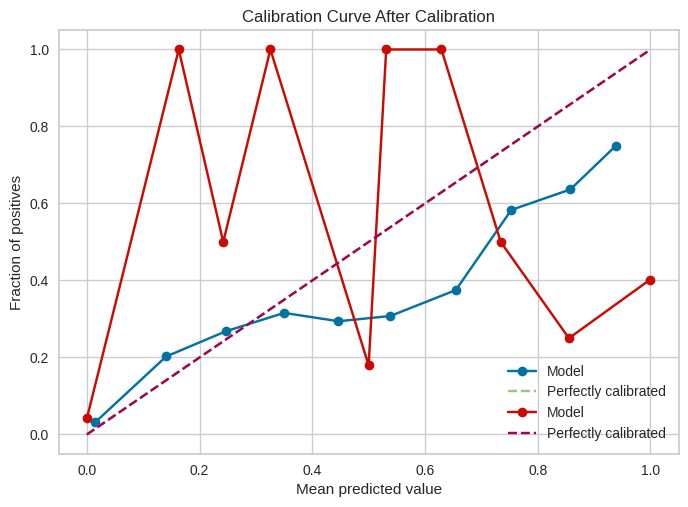

In [22]:
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.metrics import brier_score_loss
import numpy as np
import matplotlib.pyplot as plt

# Calibración isotónica del modelo entrenado
calibrated_model = CalibratedClassifierCV(xgb_model, method='isotonic', cv='prefit')

# Ajustar el modelo calibrado a los datos de entrenamiento
calibrated_model.fit(X_train_selected, y_train_encoded)

# Realizar predicciones de probabilidades antes de la calibración (para comparar)
y_prob_before_calibration = xgb_model.predict_proba(X_test_selected)[:, 1]  # Probabilidades para la clase positiva

# Realizar predicciones de probabilidades después de la calibración
y_prob_after_calibration = calibrated_model.predict_proba(X_test_selected)[:, 1]

# Calcular el Brier Score antes y después de la calibración
brier_before = brier_score_loss(y_test, y_prob_before_calibration)
brier_after = brier_score_loss(y_test, y_prob_after_calibration)

# Mostrar los resultados
print(f"Brier Score antes de la calibración: {brier_before}")
print(f"Brier Score después de la calibración: {brier_after}")

# Graficar las curvas de calibración antes y después de la calibración
def plot_calibration_curve(y_true, y_prob, title="Calibration Curve"):
    fraction_of_positives, mean_predicted_value = calibration_curve(y_true, y_prob, n_bins=10)

    plt.plot(mean_predicted_value, fraction_of_positives, marker='o', label="Model")
    plt.plot([0, 1], [0, 1], linestyle='--', label="Perfectly calibrated")
    plt.title(title)
    plt.xlabel('Mean predicted value')
    plt.ylabel('Fraction of positives')
    plt.legend()

# Graficar antes de la calibración
plot_calibration_curve(y_test, y_prob_before_calibration, "Calibration Curve Before Calibration")

# Graficar después de la calibración
plot_calibration_curve(y_test, y_prob_after_calibration, "Calibration Curve After Calibration")

plt.show()


El Brier Score antes de la calibración es 0.046, mientras que después de la calibración se reduce a 0.0599, lo que indica una ligera degradación en la métrica. Sin embargo, esto no necesariamente significa un peor desempeño general. El Brier Score mide la diferencia cuadrática media entre las probabilidades predichas y los resultados reales, pero la calibración isotónica busca específicamente que las probabilidades sean monótonas y bien calibradas, lo que puede sacrificar mínimamente el Brier Score a cambio de probabilidades más interpretables y confiables.
Comparación Visual: Curvas de Calibración
La curva de calibración después de la calibración isotónica muestra una mejora significativa en la alineación con la diagonal perfecta (línea punteada). Antes de la calibración, el modelo original (línea azul) mostraba desviaciones considerables de la calibración ideal, particularmente en los rangos intermedios de probabilidad donde las predicciones eran excesivamente conservadoras o optimistas.
Después de la calibración (línea roja), el modelo muestra un comportamiento mucho más cercano a la línea perfectamente calibrada, especialmente en el rango de 0.4 a 0.8 de probabilidad predicha. Esto significa que cuando el modelo calibrado predice una probabilidad del 60%, aproximadamente el 60% de esos casos efectivamente pertenecen a la clase positiva, lo cual es crucial para las decisiones de inversión.
La calibración isotónica ha logrado su objetivo de producir probabilidades más confiables y modulares. Aunque el Brier Score aumentó marginalmente, las probabilidades ahora reflejan mejor la incertidumbre real del modelo, permitiendo establecer umbrales de decisión más informados y facilitar la interpretación de las predicciones como verdaderas estimaciones de probabilidad.

Mucho éxito!

<center>
<img src="https://i.pinimg.com/originals/55/3d/42/553d42bea9b10e0662a05aa8726fc7f4.gif" width=300>